## DATA VISUALIZATION AND ANALYSIS

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("pastel")

In [2]:
df=pd.read_csv('CYBER.csv')

In [3]:
df.head()

,'Flow Duration','Tot Fwd Pkts','Tot Bwd Pkts','TotLen Fwd Pkts','TotLen Bwd Pkts','Fwd Pkt Len Max','Fwd Pkt Len Min','Fwd Pkt Len Mean','Fwd Pkt Len Std','Bwd Pkt Len Max',...,'Fwd Act Data Pkts','Active Mean','Active Std','Active Max','Active Min','Idle Mean','Idle Std','Idle Max','Idle Min',Label
0,1518,2,5,110,377,110,0,55.0,77.7817,377,...,1,0,0,0,0,0,0,0,0,Brute_Force
1,5894,4,8,168,4498,168,0,42.0,84.0000,1460,...,1,0,0,0,0,0,0,0,0,Brute_Force
2,272,1,1,0,0,0,0,0.0,0.0000,0,...,0,0,0,0,0,0,0,0,0,Brute_Force
3,2611,4,8,322,4434,322,0,80.5,161.0000,1460,...,1,0,0,0,0,0,0,0,0,Brute_Force
4,294,1,1,0,0,0,0,0.0,0.0000,0,...,0,0,0,0,0,0,0,0,0,Brute_Force


In [4]:
df = df.dropna()

In [5]:
df=df.drop_duplicates()

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var = ['Label']
  
for i in var:
    df[i] = le.fit_transform(df[i]).astype(int)

<Axes: xlabel='Label', ylabel='count'>

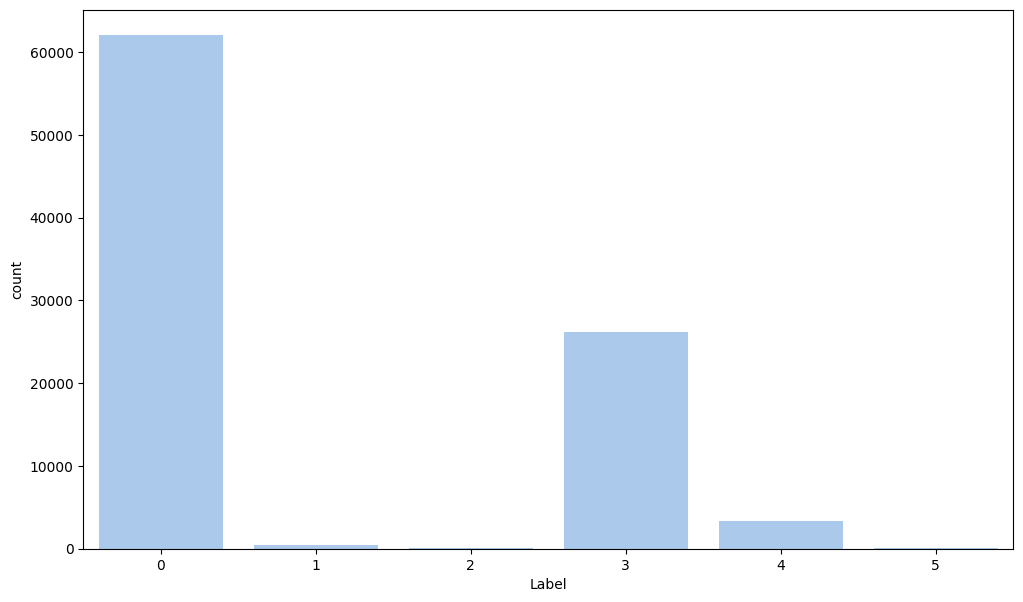

In [7]:
plt.figure(figsize=(12,7))
sns.countplot(x='Label',data=df)

(array([9.0985e+04, 5.7400e+02, 1.7400e+02, 1.5900e+02, 5.7000e+01,
        3.4000e+01, 3.5000e+01, 6.0000e+00, 7.0000e+00, 4.0000e+00]),
 array([       0. ,  7025067.2, 14050134.4, 21075201.6, 28100268.8,
        35125336. , 42150403.2, 49175470.4, 56200537.6, 63225604.8,
        70250672. ]),
 <BarContainer object of 10 artists>)

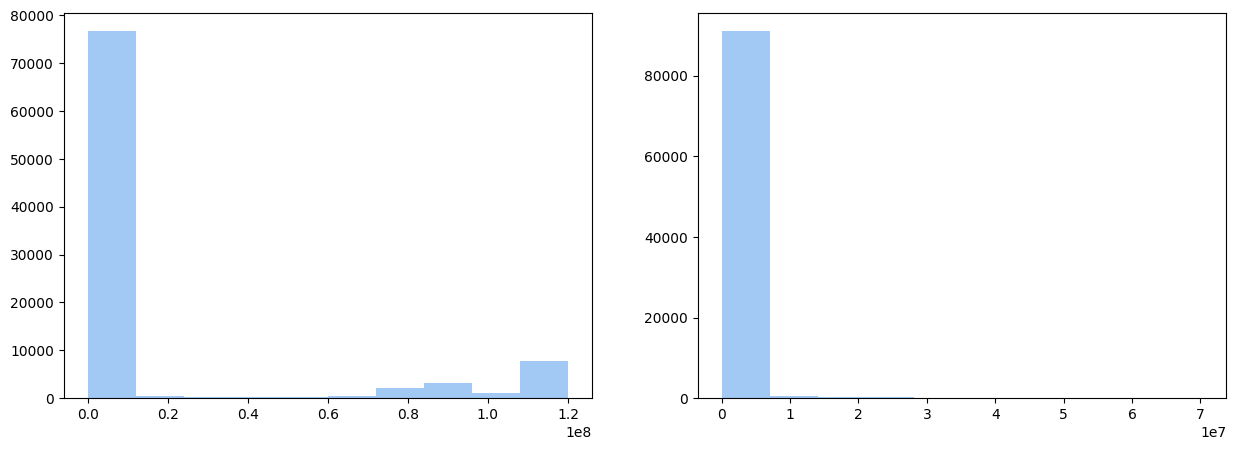

In [8]:
# Plot a Histogram
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(df["'Flow Duration'"])
plt.subplot(1,2,2)
plt.hist(df["'Active Std'"])


In [9]:
df.columns

Index([''Flow Duration'', ''Tot Fwd Pkts'', ''Tot Bwd Pkts'',
       ''TotLen Fwd Pkts'', ''TotLen Bwd Pkts'', ''Fwd Pkt Len Max'',
       ''Fwd Pkt Len Min'', ''Fwd Pkt Len Mean'', ''Fwd Pkt Len Std'',
       ''Bwd Pkt Len Max'', ''Bwd Pkt Len Min'', ''Bwd Pkt Len Mean'',
       ''Bwd Pkt Len Std'', ''Flow Byts/s'', ''Flow Pkts/s'',
       ''Flow IAT Mean'', ''Flow IAT Std'', ''Flow IAT Max'', ''Flow IAT Min'',
       ''Fwd IAT Tot'', ''Fwd IAT Mean'', ''Fwd IAT Std'', ''Fwd IAT Max'',
       ''Fwd IAT Min'', ''Bwd IAT Tot'', ''Bwd IAT Mean'', ''Bwd IAT Std'',
       ''Bwd IAT Max'', ''Bwd IAT Min'', ''Bwd PSH Flags'', ''Bwd URG Flags'',
       ''Fwd Header Len'', ''Bwd Header Len'', ''Fwd Pkts/s'', ''Bwd Pkts/s'',
       ''Pkt Len Min'', ''Pkt Len Max'', ''Pkt Len Mean'', ''Pkt Len Std'',
       ''Pkt Len Var'', ''FIN Flag Cnt'', ''SYN Flag Cnt'', ''RST Flag Cnt'',
       ''PSH Flag Cnt'', ''ACK Flag Cnt'', ''URG Flag Cnt'',
       ''CWE Flag Count'', ''ECE Flag Cnt'', ''Down/Up Rati

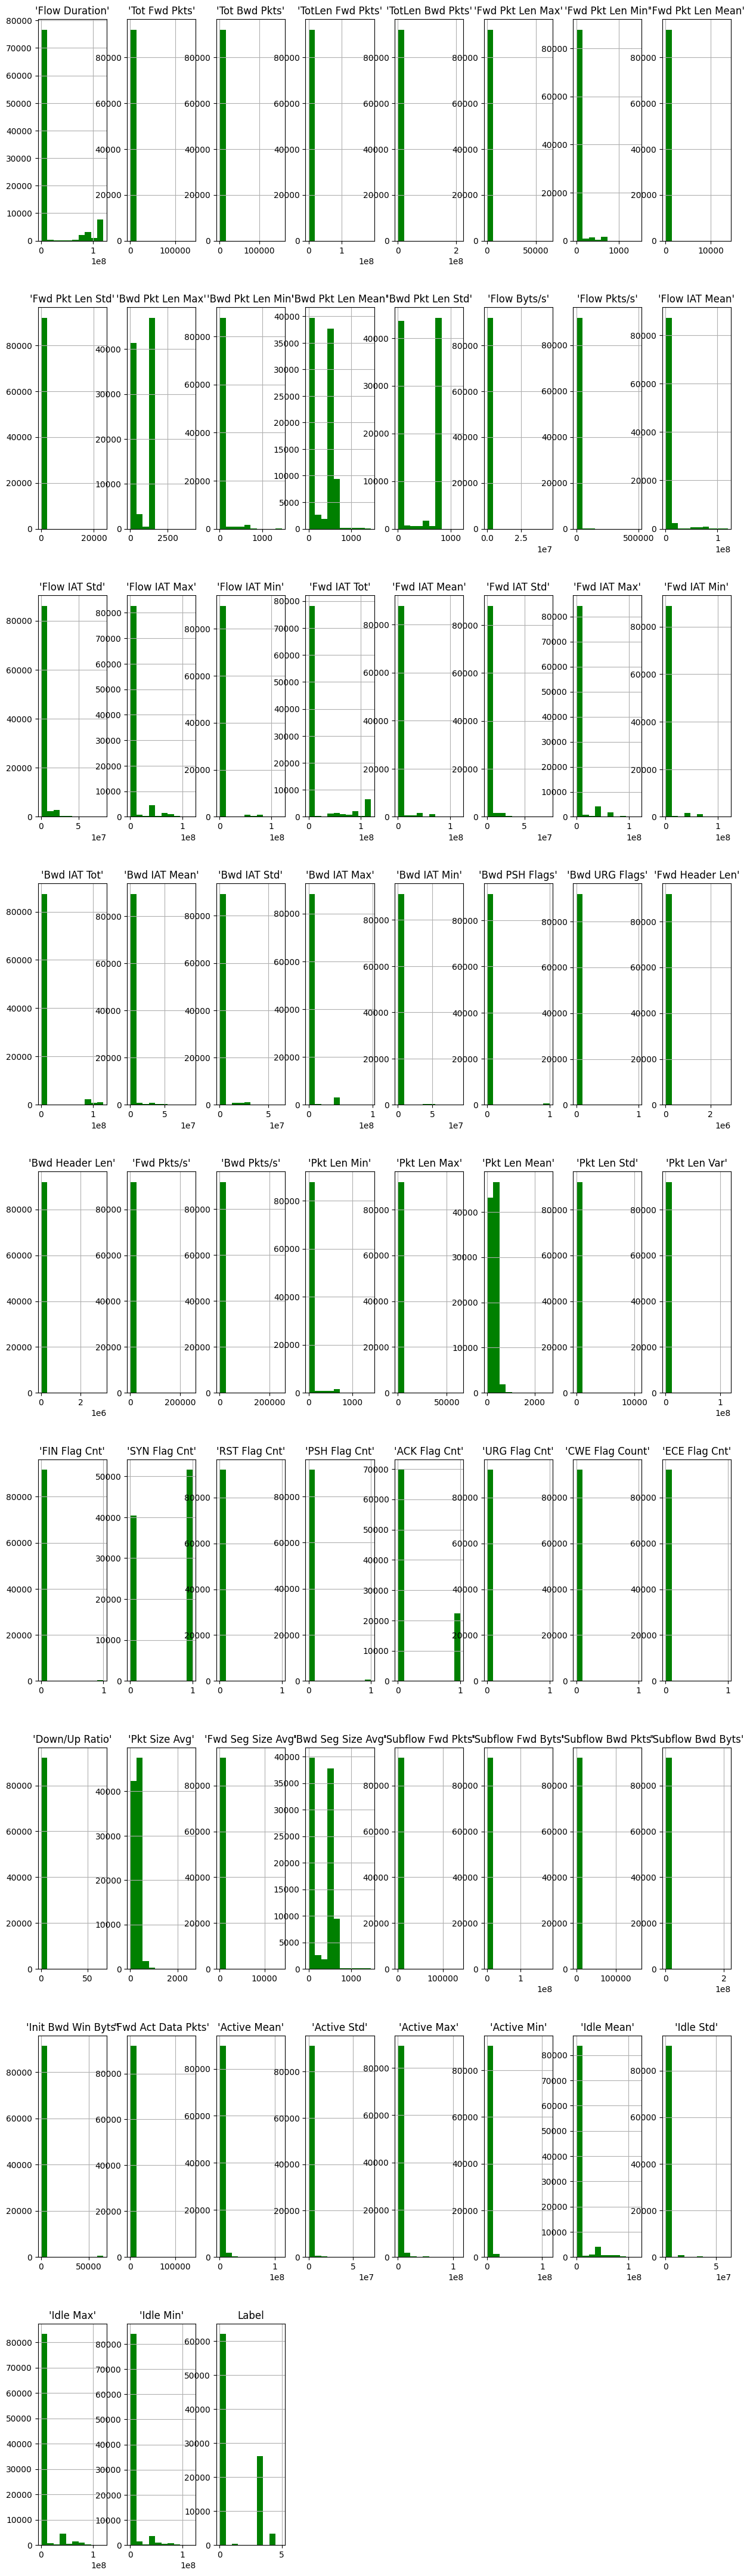

In [10]:
df.hist(figsize=(15,55), color='green')
plt.show()

<Axes: >

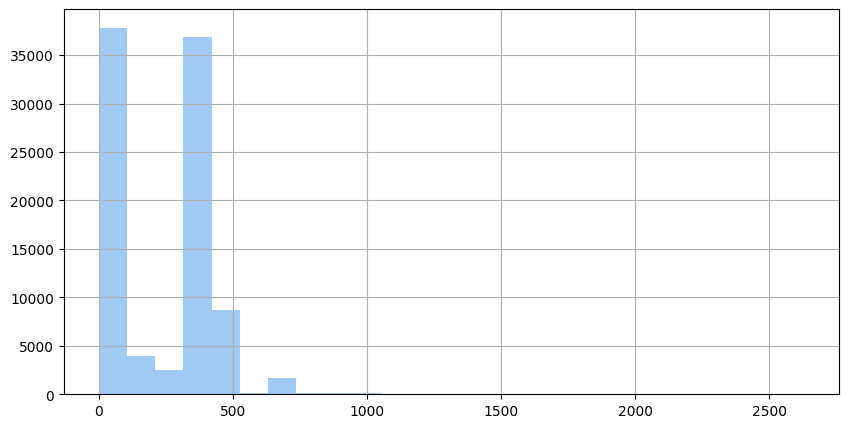

In [11]:
df["'Pkt Len Mean'"].hist(figsize=(10,5),bins=25)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ae03887fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ae03891310>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ae038246d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ae0381e790>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ae03892110>],
 'means': []}

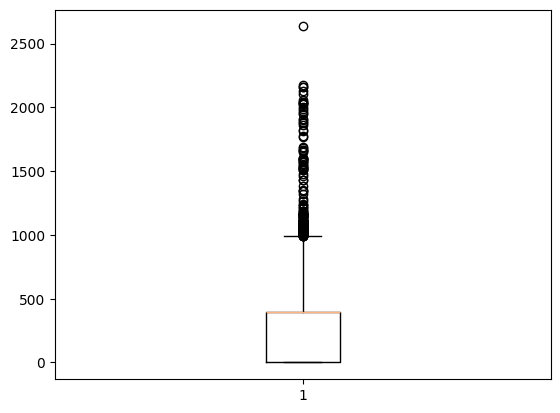

In [12]:
# Checking the outliers in the dataset.
plt.boxplot(df["'Pkt Size Avg'"]) 

<Axes: ylabel='Density'>

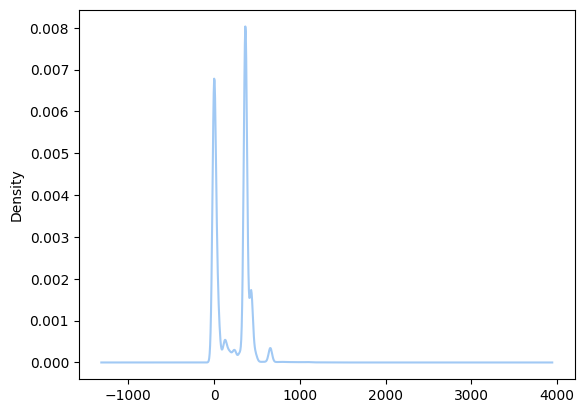

In [13]:
# Plotting a density plot.
df["'Pkt Len Mean'"].plot(kind='density')

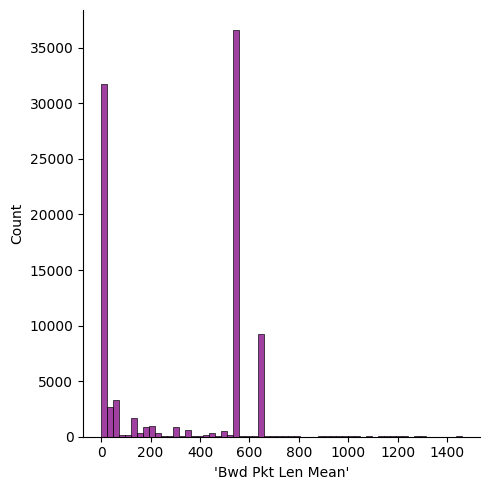

In [14]:
# Plotting a distance plot.
sns.displot(df["'Bwd Pkt Len Mean'"], color='purple') 

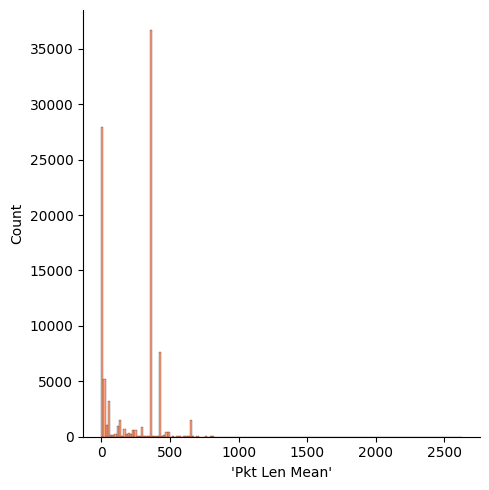

In [15]:
# Plotting a distance plot.
sns.displot(df["'Pkt Len Mean'"], color='coral') # residplot, scatterplot 

<Axes: >

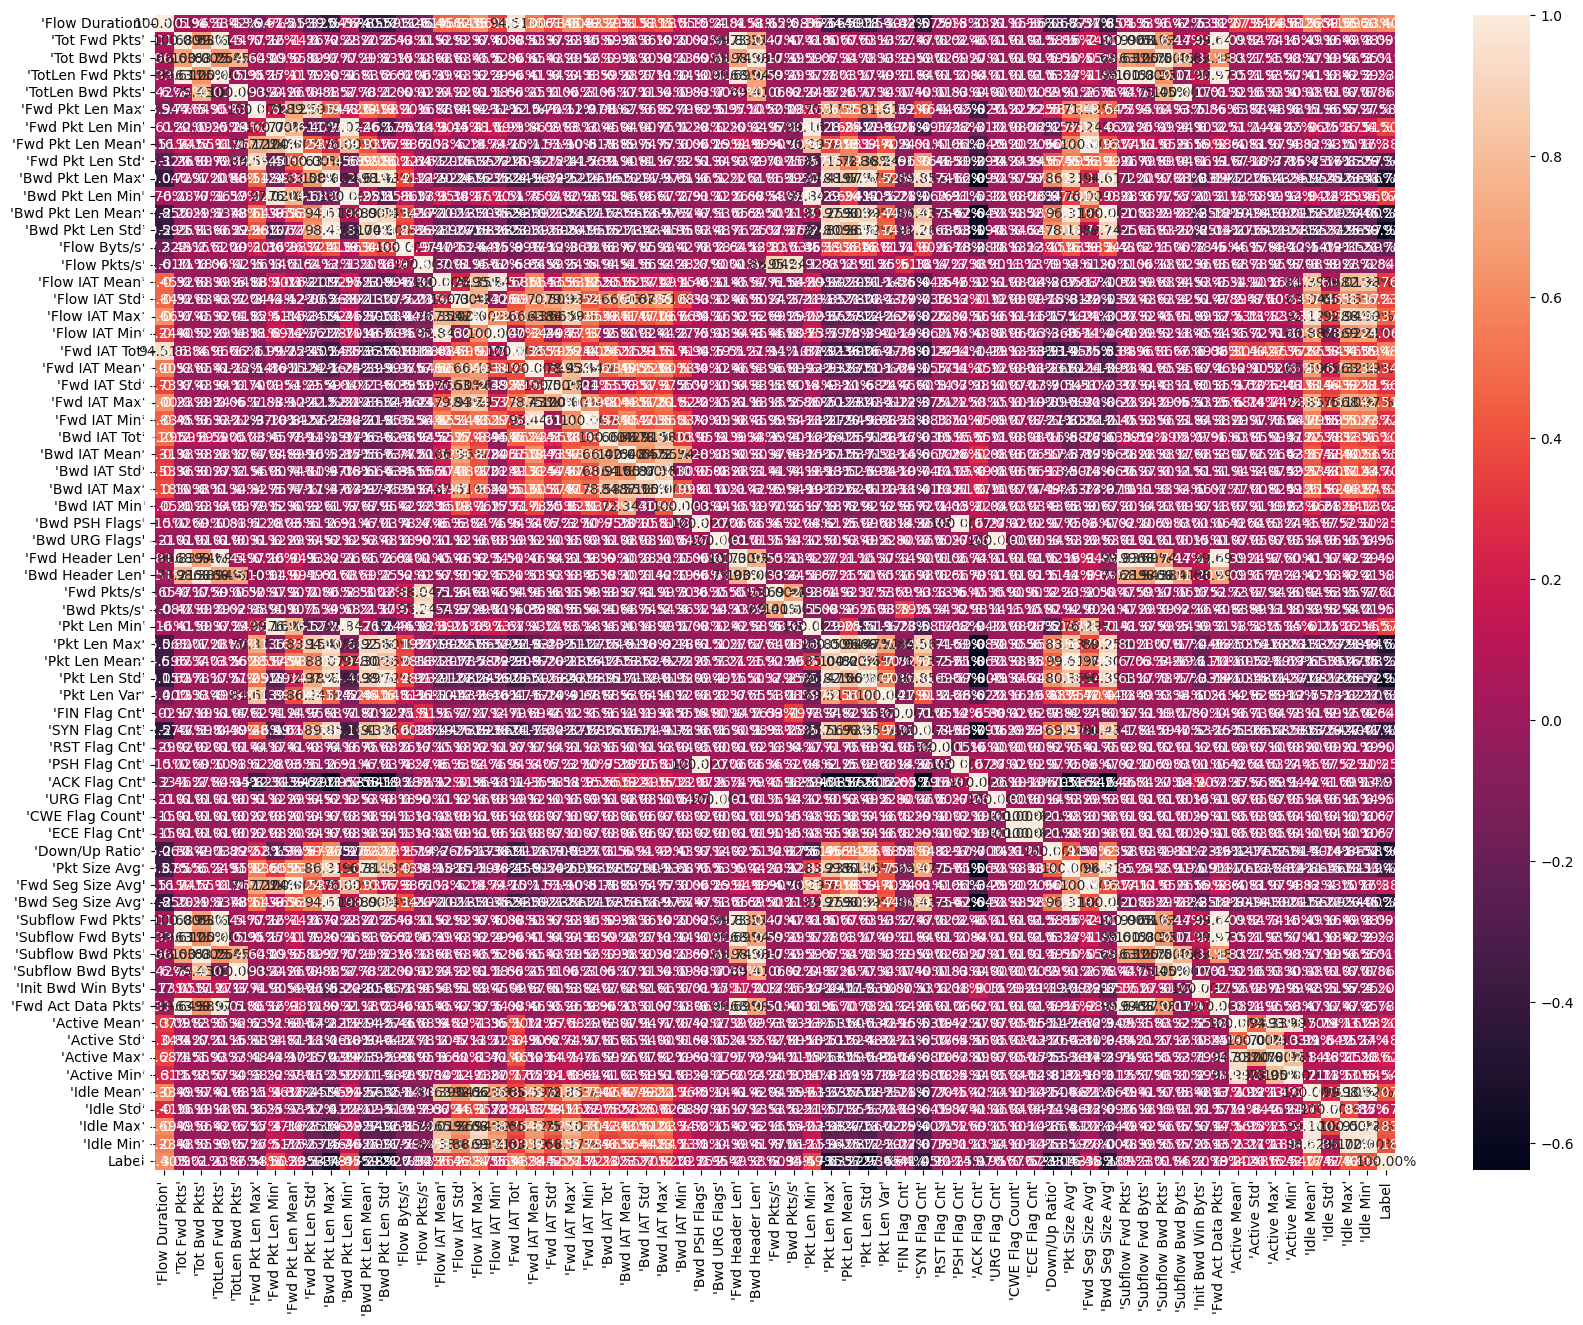

In [16]:
# Plotting a heatmap for determining the correlation among the columns.
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(),annot = True, fmt='0.2%',ax=ax)

Label
0    67.39
3    28.48
4     3.58
1     0.48
2     0.05
5     0.03
Name: count, dtype: float64

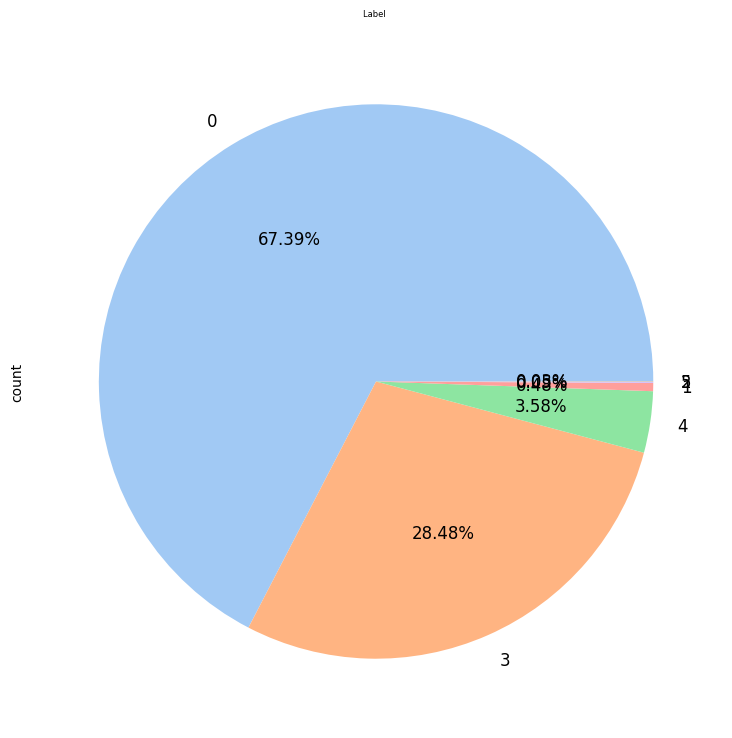

In [17]:
# Plotting a Piechart. 
def plot(df, variable):
    dataframe_pie = df[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(9,9), autopct='%1.2f%%', fontsize =12 )
    ax.set_title(variable + ' \n', fontsize = 6)
    return np.round(dataframe_pie/df.shape[0]*100,2)

plot(df, 'Label')